In [79]:
import netCDF4 as nc
import numpy as np
import pylab as plt
import xarray as xr
import glob

maindir = '/projects/awaken/j3lee/run_amrw/stable/s3_20180612-10m-p/'
stat_dir = 'post_processing'

lidar_dir = '/projects/awaken/j3lee/arm-data/sgpdlprofwstats4newsC1/'
lidar_file = 'sgpdlprofwstats4newsC1.c1.20180612.000000.custom.nc'

# in UTC
start_time = 3
# in hours
sim_duration = 6

In [159]:
# when using xarray multifile dataset, have to grab each group of the nc files individually
xtime = xr.open_mfdataset(maindir+stat_dir+'/abl_statistics*.nc', 
                          concat_dim=['num_time_steps'], combine='nested')

xprof = xr.open_mfdataset(maindir+stat_dir+'/abl_statistics*.nc', group='mean_profiles', 
                          concat_dim=['num_time_steps'], combine='nested')

# remove duplicated times
_, index = np.unique(xtime['time'], return_index=True)
xtime = xtime.isel(num_time_steps=index)
xprof = xprof.isel(num_time_steps=index)

nc_file_num = len(glob.glob1(maindir+stat_dir, 'abl_statistics*.nc'))

In [160]:
xprof

<xarray.Dataset>
Dimensions:       (nlevels: 100, num_time_steps: 36)
Dimensions without coordinates: nlevels, num_time_steps
Data variables: (12/26)
    h             (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>
    u             (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>
    v             (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>
    w             (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>
    hvelmag       (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>
    theta         (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>
    ...            ...
    v'theta'_sfs  (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>
    w'theta'_sfs  (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>
    u'v'_sfs      (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>
    u'w'_sfs      (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>
    v'w'_sfs      (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>
    k_sgs         (num_time_steps, nlevels) float64 dask.array<chunksize=(21, 100), meta=np.ndarray>

In [146]:
_, index = np.unique(xtime['time'], return_index=True)

In [152]:
_, index = np.unique(xtime['time'], return_index=True)
xtime_2 = xtime.isel(num_time_steps=index)

In [154]:
xtime_2.time.values

array([  600.        ,  1200.        ,  1800.        ,  2400.        ,
        3000.        ,  3600.        ,  4200.        ,  4800.        ,
        5400.        ,  6000.        ,  6600.        ,  7200.        ,
        7800.        ,  8400.        ,  9000.        ,  9600.        ,
       10200.        , 10800.        , 11400.00000001, 12000.00000001,
       12600.00000001, 13200.00000001, 13800.00000002, 14400.00000002,
       15000.00000002, 15600.00000002, 16200.00000002, 16800.00000003,
       17400.00000003, 18000.00000003, 18600.00000003, 19200.00000003,
       19800.00000004, 20400.00000004, 21000.00000004, 21600.00000004])

In [141]:
xtime.time.values

array([  600.        ,  1200.        ,  1800.        ,  2400.        ,
        3000.        ,  3600.        ,  4200.        ,  4800.        ,
        5400.        ,  6000.        ,  6600.        ,  7200.        ,
        7800.        ,  8400.        ,  9000.        ,  9600.        ,
       10200.        , 10800.        , 11400.00000001, 12000.00000001,
       12600.00000001, 11400.00000001, 12000.00000001, 12600.00000001,
       13200.00000001, 13800.00000002, 14400.00000002, 15000.00000002,
       15600.00000002, 16200.00000002, 16800.00000003, 17400.00000003,
       18000.00000003, 18600.00000003, 19200.00000003, 19800.00000004,
       20400.00000004, 21000.00000004, 21600.00000004])

In [140]:
xtime.Q.values

array([-0.02628738, -0.02695254, -0.02756904, -0.02818553, -0.02900724,
       -0.03008009, -0.03115294, -0.03049507, -0.02771902, -0.02494297,
       -0.02309507, -0.02238312, -0.02167116, -0.02178607, -0.02291295,
       -0.02403984, -0.02431512, -0.02354815, -0.02278119, -0.02204957,
       -0.02136123, -0.02278119, -0.02204957, -0.02136123, -0.02067289,
       -0.02181653, -0.02520227, -0.02858801, -0.02967022, -0.02793321,
       -0.02619619, -0.02464515, -0.0233217 , -0.02199826, -0.02286418,
       -0.0264096 , -0.02995501, -0.03350043, -0.03704585])

In [145]:
xtime.get_index().duplicated()

TypeError: get_index() missing 1 required positional argument: 'key'

In [142]:
xtime.sel(time=~xtime.get_index('time').duplicated())

KeyError: 'time'

In [21]:
# the forcing file used for the simulation 
forcing = nc.Dataset(maindir+'forcing_20180612_raj.nc')
print(forcing.variables.keys())

dict_keys(['heights', 'times', 'wrf_momentum_u', 'wrf_momentum_v', 'wrf_temperature', 'wrf_tflux'])


In [75]:
if nc_file_num == 1: 
    sim_height = xprof['h'].values
else: 
    sim_height = xprof['h'].values[0,:] 
print(sim_height.shape)
print(sim_height)
sim_time = np.round(xtime['time'].values)
print(sim_time.shape)
print(sim_time)

forcing_height = forcing['heights'][:]
forcing_time = forcing['times'][:]
n_fh = len(forcing_height)
n_ft = len(forcing_time)
# or n_fh = forcing.dimensions['nheight'].size

forcing_momu = np.reshape(forcing['wrf_momentum_u'][:], (n_ft, n_fh))
forcing_momv = np.reshape(forcing['wrf_momentum_v'][:], (n_ft, n_fh))
forcing_temp = np.reshape(forcing['wrf_temperature'][:], (n_ft, n_fh))

(100,)
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
 145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245. 255. 265. 275.
 285. 295. 305. 315. 325. 335. 345. 355. 365. 375. 385. 395. 405. 415.
 425. 435. 445. 455. 465. 475. 485. 495. 505. 515. 525. 535. 545. 555.
 565. 575. 585. 595. 605. 615. 625. 635. 645. 655. 665. 675. 685. 695.
 705. 715. 725. 735. 745. 755. 765. 775. 785. 795. 805. 815. 825. 835.
 845. 855. 865. 875. 885. 895. 905. 915. 925. 935. 945. 955. 965. 975.
 985. 995.]
(39,)
[  600.  1200.  1800.  2400.  3000.  3600.  4200.  4800.  5400.  6000.
  6600.  7200.  7800.  8400.  9000.  9600. 10200. 10800. 11400. 12000.
 12600. 11400. 12000. 12600. 13200. 13800. 14400. 15000. 15600. 16200.
 16800. 17400. 18000. 18600. 19200. 19800. 20400. 21000. 21600.]


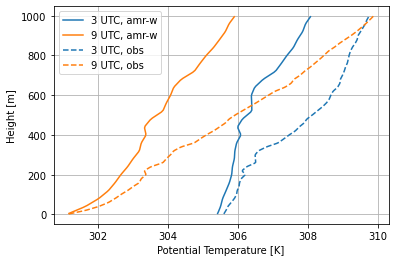

In [32]:
plt.plot(xprof['theta'].values[0,:], sim_height, 
         label=str(start_time)+' UTC, amr-w')
plt.plot(xprof['theta'].values[-1,:], sim_height, 
         label=str(start_time+sim_duration)+' UTC, amr-w')

plt.plot(forcing_temp[0,:], forcing_height, linestyle='dashed', color='C0', 
         label=str(start_time)+' UTC, obs')
plt.plot(forcing_temp[-1,:], forcing_height, linestyle='dashed', color='C1', 
         label=str(start_time+sim_duration)+' UTC, obs')
plt.xlabel('Potential Temperature [K]')
plt.ylabel('Height [m]')
plt.legend()
plt.grid(True)

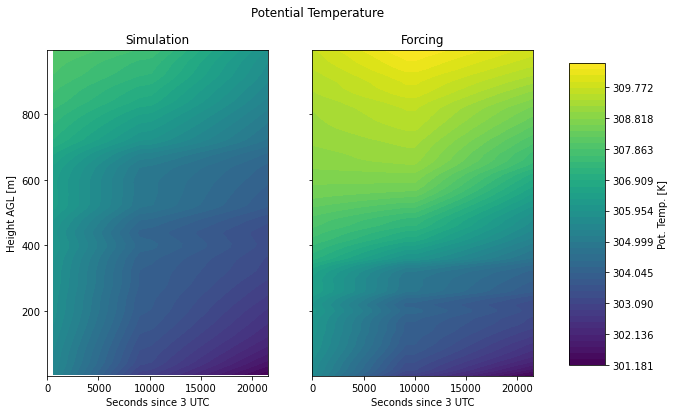

In [131]:
fig, ax = plt.subplots(figsize=(10,6),ncols=2,sharey=True,sharex=True)

contour_min = np.min([xprof['theta'].values.min(), forcing_temp.min()])
contour_max = np.max([xprof['theta'].values.max(), forcing_temp.max()])

im = ax[0].contourf(sim_time, sim_height, xprof['theta'].values.T, 
                    levels=np.linspace(contour_min, contour_max))
ax[1].contourf(forcing_time, forcing_height, forcing_temp.T, 
               levels=np.linspace(contour_min, contour_max))

plt.xlim(0, sim_time.max())
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Pot. Temp. [K]')
plt.suptitle('Potential Temperature')

ax[0].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[1].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[0].set_ylabel('Height AGL [m]')

ax[0].set_title('Simulation')
ax[1].set_title('Forcing')

plt.show()

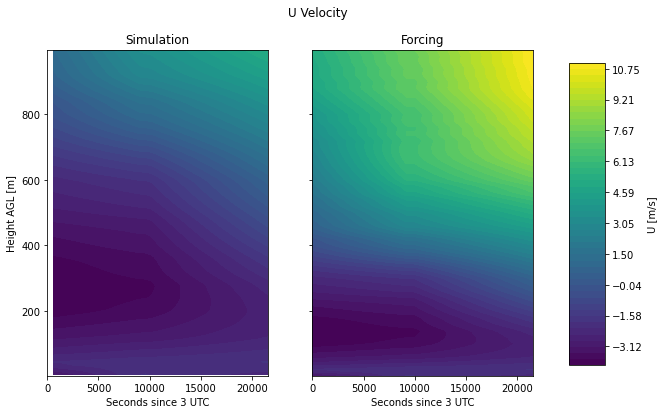

In [67]:
fig, ax = plt.subplots(figsize=(10,6),ncols=2,sharey=True,sharex=True)

contour_min = np.min([xprof['u'].values.min(), forcing_momu.min()])
contour_max = np.max([xprof['u'].values.max(), forcing_momu.max()])

im = ax[0].contourf(sim_time, sim_height, xprof['u'].values.T, 
                    levels=np.linspace(contour_min, contour_max))
ax[1].contourf(forcing_time, forcing_height, forcing_momu.T, 
               levels=np.linspace(contour_min, contour_max))

plt.xlim(0, sim_time.max())
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='U [m/s]')
plt.suptitle('U Velocity')

ax[0].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[1].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[0].set_ylabel('Height AGL [m]')

ax[0].set_title('Simulation')
ax[1].set_title('Forcing')

plt.show()

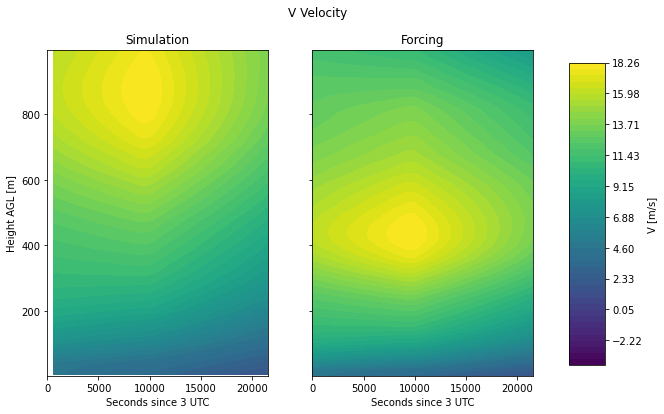

In [69]:
fig, ax = plt.subplots(figsize=(10,6),ncols=2,sharey=True,sharex=True)

contour_min = np.min([xprof['v'].values.min(), forcing_momu.min()])
contour_max = np.max([xprof['v'].values.max(), forcing_momu.max()])

im = ax[0].contourf(sim_time, sim_height, xprof['v'].values.T, 
                    levels=np.linspace(contour_min, contour_max))
ax[1].contourf(forcing_time, forcing_height, forcing_momv.T, 
               levels=np.linspace(contour_min, contour_max))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='V [m/s]')
plt.suptitle('V Velocity')

ax[0].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[1].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[0].set_ylabel('Height AGL [m]')

ax[0].set_title('Simulation')
ax[1].set_title('Forcing')

plt.show()

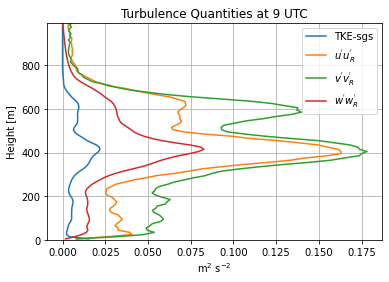

In [78]:
plt.plot(xprof['k_sgs'].values[-1,:], sim_height, 
         color='C0', label='TKE-sgs')
plt.plot(xprof['u\'u\'_r'][-1,:], sim_height, 
         color='C1', label=r"$u^{'}u^{'}_{R}$")
plt.plot(xprof['v\'v\'_r'][-1,:], sim_height, 
         color='C2',label=r"$v^{'}v^{'}_{R}$")
plt.plot(xprof['w\'w\'_r'][-1,:],sim_height, 
         color='C3',label=r"$w^{'}w^{'}_{R}$")
plt.ylim(0, sim_height.max())
# plt.xlim(-0.001,0.45)
plt.grid(True)
plt.title('Turbulence Quantities at '+str(start_time+sim_duration)+' UTC')
plt.ylabel('Height [m]')
plt.xlabel('m$^2$ s$^{-2}$')
plt.legend()
plt.show()

In [90]:
#wstat = nc.Dataset('/projects/awaken/ckaul/wrfForcing/20170628/225451/sgpdlprofwstats4newsC1.c1.20170629.000000.nc')
wstat = nc.Dataset(lidar_dir+lidar_file)
print(wstat.variables.keys())
wvar = wstat.variables['w_variance'][:,:]
snr = wstat.variables['snr'][:,:]
noise = wstat.variables['noise'][:,:]

wvar = np.ma.masked_where(snr < 0.008, wvar)
# wvar = np.ma.masked_where(noise > 1, wvar) --this masks almost everything, need to ask Rob about it

dict_keys(['base_time', 'time_offset', 'time', 'time_bounds', 'height', 'snr', 'snr_25', 'snr_75', 'w', 'w_25', 'w_75', 'noise', 'w_variance', 'w_skewness', 'w_kurtosis', 'dl_cbh', 'dl_cbh_25', 'dl_cbh_75', 'dl_cbh_zmax', 'dl_cloud_frequency', 'cbw', 'cbw_25', 'cbw_75', 'cbw_up_fraction', 'nshots', 'ngate_samples', 'averaging_time', 'snr_threshold', 'sample_frequency', 'wavelength', 'ceil_cbh', 'ceil_cbh_25', 'ceil_cbh_75', 'ceil_cbh_zmax', 'ceil_cloud_frequency', 'ceil_lat', 'ceil_lon', 'ceil_alt', 'ecor_temp', 'ecor_h2o', 'ecor_tke', 'ecor_ustar', 'ecor_w_var', 'ecor_w_skew', 'ecor_w_kurt', 'ecor_wt', 'ecor_wq', 'ecor_lat', 'ecor_lon', 'ecor_alt', 'met_spr_mean', 'met_spr_min', 'met_spr_max', 'met_lat', 'met_lon', 'met_alt', 'lat', 'lon', 'alt'])


In [123]:
wstat.variables['time'][:]

masked_array(data=[    0.,   600.,  1200.,  1800.,  2400.,  3000.,  3600.,
                    4200.,  4800.,  5400.,  6000.,  6600.,  7200.,  7800.,
                    8400.,  9000.,  9600., 10200., 10800., 11400., 12000.,
                   12600., 13200., 13800., 14400., 15000., 15600., 16200.,
                   16800., 17400., 18000., 18600., 19200., 19800., 20400.,
                   21000., 21600., 22200., 22800., 23400., 24000., 24600.,
                   25200., 25800., 26400., 27000., 27600., 28200., 28800.,
                   29400., 30000., 30600., 31200., 31800., 32400., 33000.,
                   33600., 34200., 34800., 35400., 36000., 36600., 37200.,
                   37800., 38400., 39000., 39600., 40200., 40800., 41400.,
                   42000., 42600., 43200., 43800., 44400., 45000., 45600.,
                   46200., 46800., 47400., 48000., 48600., 49200., 49800.,
                   50400., 51000., 51600., 52200., 52800., 53400., 54000.,
                   54600.

In [124]:
sim_time

array([  600.,  1200.,  1800.,  2400.,  3000.,  3600.,  4200.,  4800.,
        5400.,  6000.,  6600.,  7200.,  7800.,  8400.,  9000.,  9600.,
       10200., 10800., 11400., 12000., 12600., 11400., 12000., 12600.,
       13200., 13800., 14400., 15000., 15600., 16200., 16800., 17400.,
       18000., 18600., 19200., 19800., 20400., 21000., 21600.])

In [129]:
wstat.variables['time'][:][20:24]

masked_array(data=[12000., 12600., 13200., 13800.],
             mask=False,
       fill_value=1e+20)

In [130]:
sim_time[19:23]

array([12000., 12600., 11400., 12000.])

In [112]:
wstat.variables['time'][:][25:30]

masked_array(data=[15000., 15600., 16200., 16800., 17400.],
             mask=False,
       fill_value=1e+20)

In [113]:
sim_time[27:32]

array([15000., 15600., 16200., 16800., 17400.])

In [96]:
sim_time

array([  600.,  1200.,  1800.,  2400.,  3000.,  3600.,  4200.,  4800.,
        5400.,  6000.,  6600.,  7200.,  7800.,  8400.,  9000.,  9600.,
       10200., 10800., 11400., 12000., 12600., 11400., 12000., 12600.,
       13200., 13800., 14400., 15000., 15600., 16200., 16800., 17400.,
       18000., 18600., 19200., 19800., 20400., 21000., 21600.])

In [125]:
[i for i,v in enumerate(wstat.variables['time'][:]) if v > 14400 and v <= 18000]

[25, 26, 27, 28, 29, 30]

In [126]:
[i for i,v in enumerate(sim_time) if v > 14400 and v <= 18000]

[27, 28, 29, 30, 31, 32]

In [97]:
sim_time[>18000]

SyntaxError: invalid syntax (<ipython-input-97-ee544afa00d3>, line 1)

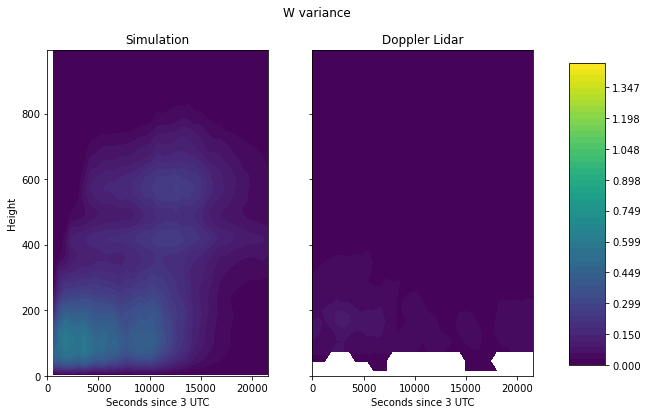

In [93]:
fig, ax = plt.subplots(figsize=(10,6),ncols=2,sharey=True,sharex=True)

contour_min = np.min([xprof['w\'w\'_r'].values.min(), wvar.min()])
contour_max = np.max([xprof['w\'w\'_r'].values.max(), wvar.max()])

im = ax[0].contourf(sim_time, sim_height, xprof['w\'w\'_r'][:,:].T, 
                    levels=np.linspace(contour_min ,contour_max))
ax[1].contourf(wstat.variables['time'][:]-start_time*3600, wstat.variables['height'][:], 
               wvar[:,:].T, levels=np.linspace(contour_min, contour_max))

plt.xlim(0, sim_time.max())
plt.ylim(0, sim_height.max())

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
ax[0].set_ylabel('Height')
ax[0].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[1].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[0].set_title('Simulation')
ax[1].set_title('Doppler Lidar')
plt.suptitle('W variance')

plt.show()

Text(0.5, 0, 'w variance [m$^2$ s$^{-2}$]')

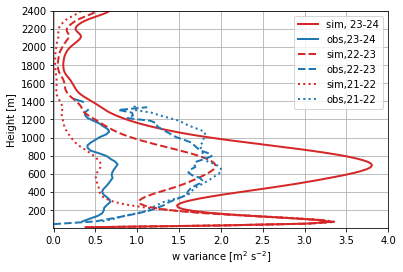

In [28]:
plt.plot(np.mean(xprof['w\'w\'_r'][-24:,:],axis=0), 
         hd, color='C3',label='sim, 23-24',linewidth=2)

plt.plot(np.ma.mean(wvar[-6:,:],axis=0), wstat.variables['height'][:], 
         color='C0', label='obs,23-24',linewidth=2)

plt.plot(np.mean(xprof['w\'w\'_r'][-48:-24,:],axis=0), hd, 
         color='C3',linestyle='dashed',label='sim,22-23',linewidth=2)

plt.plot(np.ma.mean(wvar[-12:-6,:],axis=0), wstat.variables['height'][:],
         color='C0',linestyle='dashed',label='obs,22-23',linewidth=2)

plt.plot(np.mean(xprof['w\'w\'_r'][-72:-48,:],axis=0), hd, color='C3',
         linestyle='dotted', label='sim,21-22',linewidth=2)
plt.plot(np.ma.mean(wvar[-18:-12,:],axis=0), wstat.variables['height'][:], 
         color='C0',linestyle='dotted',label='obs,21-22',linewidth=2)


plt.ylim(0,2400)
plt.xlim(-0.001,4)
plt.yticks(np.arange(200,2600,200))
plt.grid(True)
plt.legend()
plt.ylabel(r'Height [m]')
plt.xlabel(r'w variance [m$^2$ s$^{-2}$]')

Text(0, 0.5, 'Height [m]')

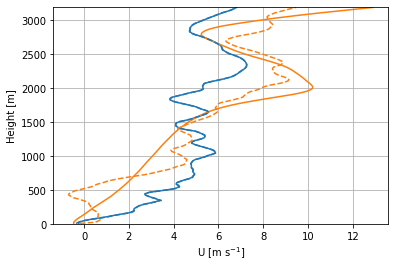

In [13]:

plt.plot(xprof['u'].values[0,:],hd, label='18 UTC,sim', color='C0')
plt.plot(xprof['u'].values[-1,:],hd, label='23 UTC,sim', color='C1')


wrfvar=np.reshape(forcing.variables['wrf_momentum_u'][:], (ntf,nhf))
plt.plot(wrfvar[0,:],hf, linestyle='dashed', color='C0', label='18 UTC obs')
plt.plot(wrfvar[-1,:],hf,linestyle='dashed', color='C1',label='23 UTC obs')

plt.ylim(0,3200)
# plt.xlim(-0.001,0.45)
plt.grid(True)
plt.xlabel(r'U [m s$^{-1}$]')
plt.ylabel(r'Height [m]')

Text(0, 0.5, 'Height [m]')

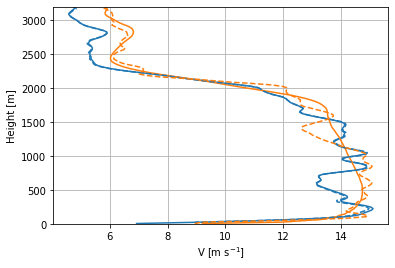

In [14]:

plt.plot(xprof['v'].values[0,:],hd, label='18 UTC,sim', color='C0')
plt.plot(xprof['v'].values[-1,:],hd, label='23 UTC,sim', color='C1')


wrfvar=np.reshape(forcing.variables['wrf_momentum_v'][:], (ntf,nhf))
plt.plot(wrfvar[0,:],hf, linestyle='dashed', color='C0', label='18 UTC obs')
plt.plot(wrfvar[-1,:],hf,linestyle='dashed', color='C1',label='23 UTC obs')

plt.ylim(0,3200)
# plt.xlim(-0.001,0.45)
plt.grid(True)
plt.xlabel(r'V [m s$^{-1}$]')
plt.ylabel(r'Height [m]')